In [70]:
import pandas as pd
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import random
import datetime 

In [71]:
# df1 = pd.read_csv("KAG_conversion_data.csv")

In [72]:
# df1 = df1[['Impressions', 'Clicks', 'Total_Conversion', 'Approved_Conversion']]

In [73]:
# cart_abandonment_rate = df1.Approved_Conversion.sum()/df1.Total_Conversion.sum()

# fig1, ax1 = plt.subplots()
# ax1.pie([cart_abandonment_rate*100, (1- cart_abandonment_rate)*100], labels=["Purchases", "Shopping_carts"], autopct='%1.1f%%',
#         shadow=True, startangle=90)
#  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.axis('equal')

# plt.show()

In [74]:
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date, periods=30, freq='D')

df2 = pd.DataFrame(index=index)
df2['Conversions'] = [random.randint(1, 80) for x in range(len(df2.index))] 
df2['Impressions'] = [random.randint(100, 700) for x in range(len(df2.index))] 
df2['Clicks'] = [random.randint(50, 300) for x in range(len(df2.index))]

In [75]:
# fig = go.Figure(go.Funnel(
#     y = ['Impressions', 'Clicks', 'Conversions'],
#     x = df2[['Impressions', 'Clicks', 'Conversions']].sum().values))
# print(df2[['Impressions', 'Clicks', 'Conversions']].sum().values)
# fig.show()

In [76]:
df2['Tot_Revenue'] = df2.Conversions.apply(lambda x: sum([random.randint(5,40) for idx in range(x)]))

In [77]:
df2['Tot_Cost'] = df2.Conversions.apply(lambda x: x*0.63)

In [78]:
df2['Conversion_Rate'] = df2.Conversions/df2.Impressions
df2['Average_order_value'] = df2.Tot_Revenue/df2.Conversions

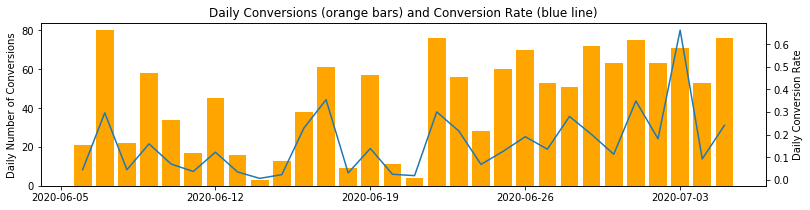

In [79]:
fig, ax1 = plt.subplots(figsize=(13,3))
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.bar(df2.index, df2.Conversions, color='orange')
ax1.grid(b=False)
ax2.plot(df2.Conversion_Rate)
ax1.set_title('Daily Conversions (orange bars) and Conversion Rate (blue line)')
ax2.set_ylabel('Daily Conversion Rate')
ax1.set_ylabel('Daily Number of Conversions')
plt.savefig('graph3.pdf')

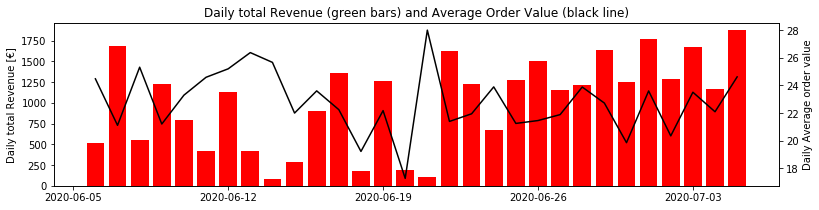

In [80]:
fig, ax1 = plt.subplots(figsize=(13,3))
ax2 = ax1.twinx()
ax1.bar(df2.index, df2.Tot_Revenue, color='red')
ax1.grid(b=False)
ax2.plot(df2.Average_order_value, color='black')
ax1.set_title('Daily total Revenue (green bars) and Average Order Value (black line)')
ax2.set_ylabel('Daily Average order value')
ax1.set_ylabel('Daily total Revenue [€]')
plt.savefig('graph4.pdf')

In [82]:
todays_date = datetime.date(2018,1,1)
index = pd.date_range(todays_date, periods=12, freq='M')

In [83]:
df3 = pd.DataFrame(index=index.to_period('M'))
df3["New_customers"] = [random.randint(1,500) for x in range(len(df3.index))]
sale_marketing_cost = random.sample(range(450, 2000), len(df3.index))
sale_marketing_cost.sort()
df3["Sale_marketing_cost"] = sale_marketing_cost
df3["Cost_customer_acquisition"] = df3.Sale_marketing_cost/df3.New_customers

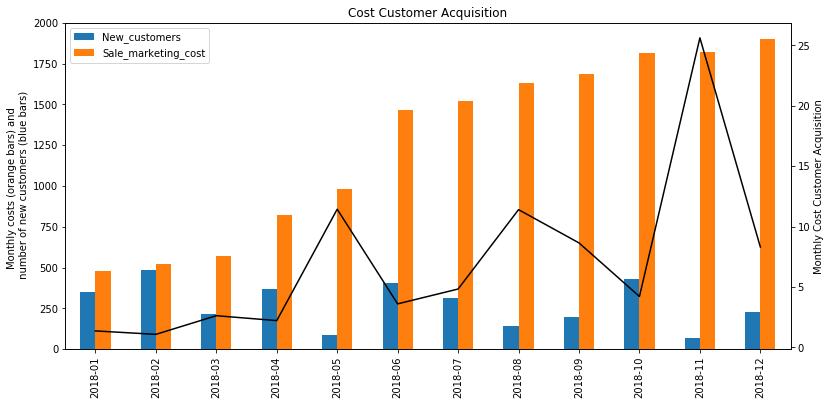

In [88]:
fig, ax1 = plt.subplots(figsize=(13,6))
ax2 = ax1.twinx()  # set up the 2nd axis
df3[['New_customers', 'Sale_marketing_cost']].plot.bar(ax=ax1)
ax1.grid(b=False)
ax2.plot(df3["Cost_customer_acquisition"].values, color='black')
ax1.set_title('Cost Customer Acquisition')
ax1.set_ylabel('Monthly costs (orange bars) and \n number of new customers (blue bars)')
ax2.set_ylabel('Monthly Cost Customer Acquisition')
plt.savefig('graph5.pdf')

In [25]:
df3['Tot_Revenue'] = [random.randint(300,2000) for idx in range(len(df3))]
df3['Tot_Cost'] = df3.Tot_Revenue.apply(lambda x: x*0.63)

In [62]:
df3['Gross_profit_margin'] = df3['Tot_Revenue'] - df3['Tot_Cost']

In [63]:
df3['Gross_profit_margin'] = df3['Gross_profit_margin'].apply(lambda x: x/df3['Tot_Revenue'])

In [64]:
df3['Gross_profit_margin'] = df3['Gross_profit_margin']*100

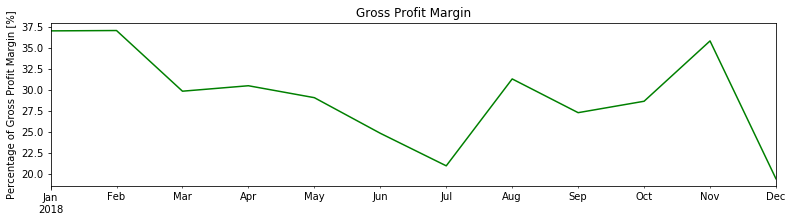

In [66]:
fig, ax1 = plt.subplots(figsize=(13,3))
df3['Gross_profit_margin'].plot(kind="line", color='green', ax=ax1)
ax1.set_title('Gross Profit Margin')
ax1.set_ylabel('Percentage of Gross Profit Margin [%]')